In [1]:
# import libraries we will use for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#to appear plots in Jupyter Notebook
%matplotlib inline

In [2]:
# import the Covid data
covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

### Exploratory Data Analysis

In [3]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
covid.shape

(59921, 50)

In [5]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [6]:
covid.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [7]:
# Convert argument to datetime. ['date'] from object to datetimes64
covid['date']=pd.to_datetime(covid['date'])
covid.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 float64
icu_patients_per_million                     f

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59921 entries, 0 to 59920
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   iso_code                            59608 non-null  object        
 1   continent                           59294 non-null  object        
 2   location                            59921 non-null  object        
 3   date                                59921 non-null  datetime64[ns]
 4   total_cases                         51168 non-null  float64       
 5   new_cases                           59784 non-null  float64       
 6   new_cases_smoothed                  58828 non-null  float64       
 7   total_deaths                        43356 non-null  float64       
 8   new_deaths                          59784 non-null  float64       
 9   new_deaths_smoothed                 58828 non-null  float64       
 10  total_cases_per_millio

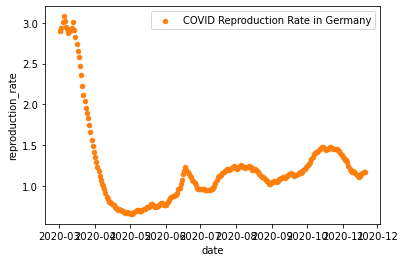

In [9]:
#draw a scatter plot to see how COVID reporduction rate changed every day in Germany
covid.loc[covid['location']=='Germany'].plot.scatter(x='date', y='reproduction_rate', c='#ff7f0e', label='COVID Reproduction Rate in Germany')
#I choose the scatter plot see the the trends change everyday.

In [10]:
germany = covid.loc[covid['location']=='Germany']
germany

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
13776,DEU,Europe,Germany,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
13777,DEU,Europe,Germany,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
13778,DEU,Europe,Germany,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
13779,DEU,Europe,Germany,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
13780,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14084,DEU,Europe,Germany,2020-11-26,1017830.0,21951.0,18043.571,15640.0,430.0,282.571,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
14085,DEU,Europe,Germany,2020-11-27,1038649.0,20819.0,17790.143,16011.0,371.0,299.000,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
14086,DEU,Europe,Germany,2020-11-28,1052494.0,13845.0,17786.286,16181.0,170.0,302.857,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
14087,DEU,Europe,Germany,2020-11-29,1055691.0,3197.0,17617.714,16306.0,125.0,306.714,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


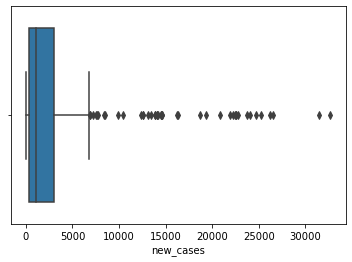

In [11]:
#check how many new cases in Germany
sns.boxplot(germany['new_cases'])
#use box plot we can see the median, maximum, and minimum. The highest can be 25,000 (outlier) and the lowest can be 0 in a day.
#most of the daily new cases are below 2500.

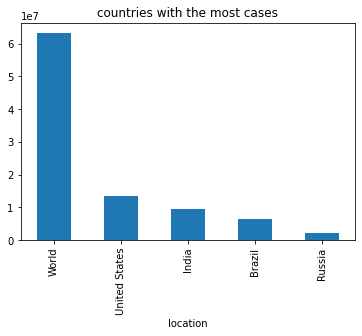

In [12]:
# Find countries with most cases
total_cases = covid.groupby(['location'])['new_cases'].sum().sort_values(ascending=False)
total_cases.head(5).plot(kind='bar',title='countries with the most cases')
#I choose bar chart as countries are categories so I can rank them from high to low or vice versa.

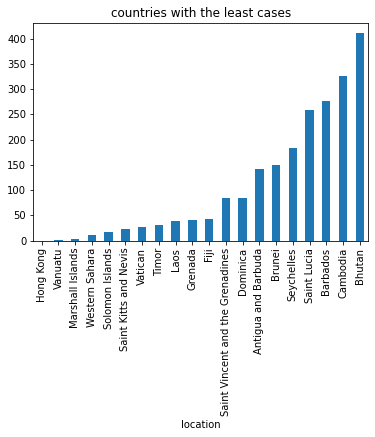

In [13]:
# Find countries with fewest cases
total_cases = covid.groupby(['location'])['new_cases'].sum().sort_values(ascending=True)
total_cases.head(20).plot(kind='bar',title='countries with the least cases')

### Check missing and duplicate values

In [14]:
covid.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59916    False
59917    False
59918    False
59919    False
59920    False
Length: 59921, dtype: bool

In [15]:
covid.duplicated().sum()    

0

In [16]:
# Results show no duplicated data. If there is any, remove them. 
# covid[covid.duplicated()== True]
# covid.drop_duplicates(inplace=True)

In [17]:
covid.isna().sum()

iso_code                                313
continent                               627
location                                  0
date                                      0
total_cases                            8753
new_cases                               137
new_cases_smoothed                     1093
total_deaths                          16565
new_deaths                              137
new_deaths_smoothed                    1093
total_cases_per_million                9051
new_cases_per_million                   450
new_cases_smoothed_per_million         1401
total_deaths_per_million              16850
new_deaths_per_million                  450
new_deaths_smoothed_per_million        1401
reproduction_rate                     19924
icu_patients                          55174
icu_patients_per_million              55174
hosp_patients                         54500
hosp_patients_per_million             54500
weekly_icu_admissions                 59477
weekly_icu_admissions_per_millio

In [18]:
# Check the percentage of the total missing in each column
covid.isna().sum() / len(covid)

iso_code                              0.005224
continent                             0.010464
location                              0.000000
date                                  0.000000
total_cases                           0.146076
new_cases                             0.002286
new_cases_smoothed                    0.018241
total_deaths                          0.276447
new_deaths                            0.002286
new_deaths_smoothed                   0.018241
total_cases_per_million               0.151049
new_cases_per_million                 0.007510
new_cases_smoothed_per_million        0.023381
total_deaths_per_million              0.281204
new_deaths_per_million                0.007510
new_deaths_smoothed_per_million       0.023381
reproduction_rate                     0.332504
icu_patients                          0.920779
icu_patients_per_million              0.920779
hosp_patients                         0.909531
hosp_patients_per_million             0.909531
weekly_icu_ad

In [19]:
# Check the percentage of the total missing in each column
covid.isna().sum() / len(covid)

iso_code                              0.005224
continent                             0.010464
location                              0.000000
date                                  0.000000
total_cases                           0.146076
new_cases                             0.002286
new_cases_smoothed                    0.018241
total_deaths                          0.276447
new_deaths                            0.002286
new_deaths_smoothed                   0.018241
total_cases_per_million               0.151049
new_cases_per_million                 0.007510
new_cases_smoothed_per_million        0.023381
total_deaths_per_million              0.281204
new_deaths_per_million                0.007510
new_deaths_smoothed_per_million       0.023381
reproduction_rate                     0.332504
icu_patients                          0.920779
icu_patients_per_million              0.920779
hosp_patients                         0.909531
hosp_patients_per_million             0.909531
weekly_icu_ad

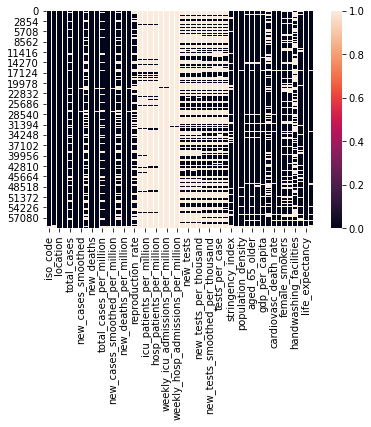

In [20]:
# show the missing data
sns.heatmap(covid.isnull())
# heatmap shows clearly where the data is null

### Analyze Countries

In [21]:
# check start and end date of the current data
date_min = covid['date'].min()
date_max = covid['date'].max()
print(date_min)
print(date_max)

2020-01-01 00:00:00
2020-12-01 00:00:00


In [22]:
covid.index

RangeIndex(start=0, stop=59921, step=1)

In [23]:
covid.set_index('date', inplace=True) #set date as index
covid.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-24,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-25,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-26,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-27,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [24]:
# check what countries are on the list
set(covid['location'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 

In [25]:
france_set = covid[covid['location']=='France']
france_set

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,FRA,Europe,France,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
2020-01-24,FRA,Europe,France,2.0,2.0,NaN,NaN,0.0,NaN,0.031,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
2020-01-25,FRA,Europe,France,3.0,1.0,NaN,NaN,0.0,NaN,0.046,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
2020-01-26,FRA,Europe,France,3.0,0.0,NaN,NaN,0.0,NaN,0.046,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
2020-01-27,FRA,Europe,France,3.0,0.0,NaN,NaN,0.0,NaN,0.046,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,FRA,Europe,France,2235537.0,13663.0,14063.000,51041.0,341.0,548.571,34248.762,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
2020-11-27,FRA,Europe,France,2248209.0,12672.0,12552.286,51999.0,958.0,522.571,34442.899,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
2020-11-28,FRA,Europe,France,2260789.0,12580.0,11823.714,52212.0,213.0,517.000,34635.627,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901


In [26]:
france_status = france_set.loc[:,['new_cases','new_deaths']]
france_status

,new_cases,new_deaths
date,,
2020-01-23,0.0,0.0
2020-01-24,2.0,0.0
2020-01-25,1.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
...,...,...
2020-11-26,13663.0,341.0
2020-11-27,12672.0,958.0
2020-11-28,12580.0,213.0


In [27]:
#check if there is any case and death in France in Jan
france_status.loc['2020-01'] 

,new_cases,new_deaths
date,,
2020-01-23,0.0,0.0
2020-01-24,2.0,0.0
2020-01-25,1.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
2020-01-28,1.0,0.0
2020-01-29,1.0,0.0
2020-01-30,0.0,0.0
2020-01-31,0.0,0.0


In [28]:
#The first cases were reported on 25 Jan. Now check when there was the first death.
france_status.loc['2020-01':'2020-02']

,new_cases,new_deaths
date,,
2020-01-23,0.0,0.0
2020-01-24,2.0,0.0
2020-01-25,1.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
2020-01-28,1.0,0.0
2020-01-29,1.0,0.0
2020-01-30,0.0,0.0
2020-01-31,0.0,0.0


In [29]:
# The first death was reported on Feb 15.

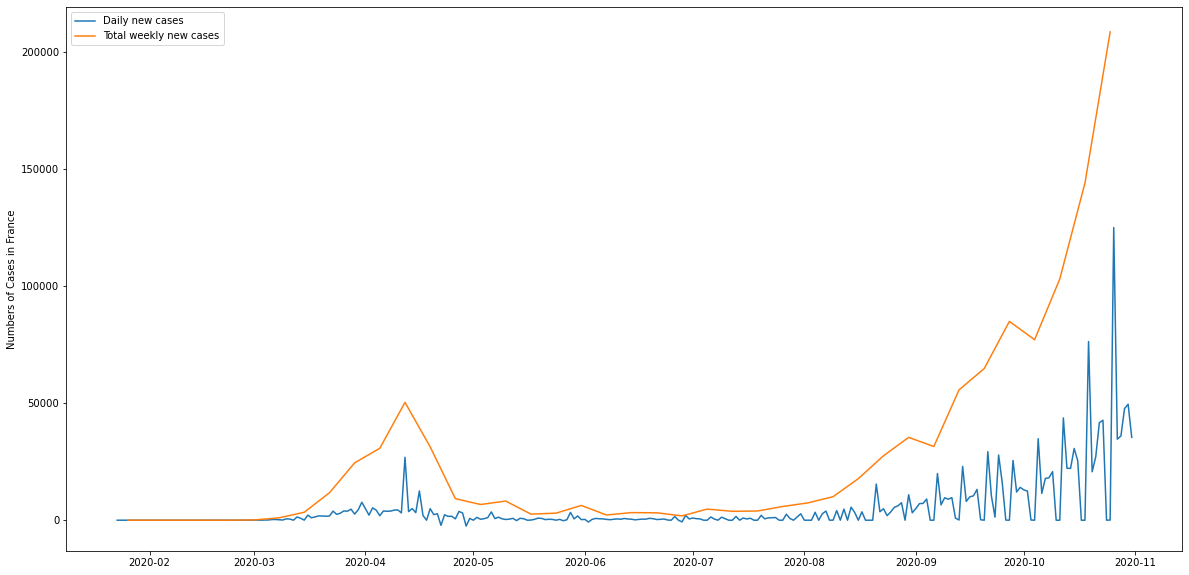

In [30]:
# Compare daily cases and total weekly case during Jan-Oct
start, end = '2020-01-01', '2020-10-31'

weekly_sum = france_status.resample('W').agg(['sum'])

fig, axes = plt.subplots(figsize=(20,10))
axes.plot(france_status.loc[start:end, 'new_cases'], label = 'Daily new cases')
axes.plot(weekly_sum.loc[start:end, 'new_cases'], label = 'Total weekly new cases')
axes.set_ylabel('Numbers of Cases in France')
axes.legend();

In [31]:
france_status['cumulative_cases'] = france_status['new_cases'].cumsum().round(0).astype(int)
france_status['cumulative_deaths'] = france_status['new_deaths'].cumsum().round(0).astype(int)
france_status

,new_cases,new_deaths,cumulative_cases,cumulative_deaths
date,,,,
2020-01-23,0.0,0.0,0,0
2020-01-24,2.0,0.0,2,0
2020-01-25,1.0,0.0,3,0
2020-01-26,0.0,0.0,3,0
2020-01-27,0.0,0.0,3,0
...,...,...,...,...
2020-11-26,13663.0,341.0,2235537,51041
2020-11-27,12672.0,958.0,2248209,51999
2020-11-28,12580.0,213.0,2260789,52212


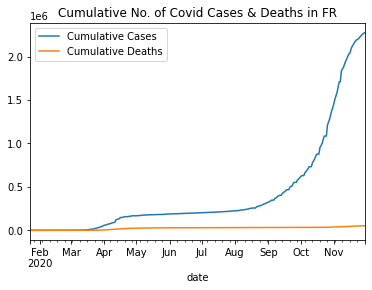

In [32]:
france_status['cumulative_cases'].plot(label='Cumulative Cases')
france_status['cumulative_deaths'].plot(label='Cumulative Deaths')

plt.title('Cumulative No. of Covid Cases & Deaths in FR')
plt.legend()

### Correlation Analysis

In [33]:
#check if there is a corelationship between cases and deaths in France
np.corrcoef(france_status['new_cases'],france_status['new_deaths'])

array([[1.        , 0.31164789],
       [0.31164789, 1.        ]])

In [34]:
round(np.corrcoef(france_status['new_cases'],france_status['new_deaths'])[1][0],2)

0.31

In [35]:
france_status.corr()

,new_cases,new_deaths,cumulative_cases,cumulative_deaths
new_cases,1.000000,0.311648,0.601693,0.370965
new_deaths,0.311648,1.000000,0.378694,0.124444
cumulative_cases,0.601693,0.378694,1.000000,0.700605
cumulative_deaths,0.370965,0.124444,0.700605,1.000000


In [36]:
np.round(france_status.corr(),2)

,new_cases,new_deaths,cumulative_cases,cumulative_deaths
new_cases,1.00,0.31,0.60,0.37
new_deaths,0.31,1.00,0.38,0.12
cumulative_cases,0.60,0.38,1.00,0.70
cumulative_deaths,0.37,0.12,0.70,1.00


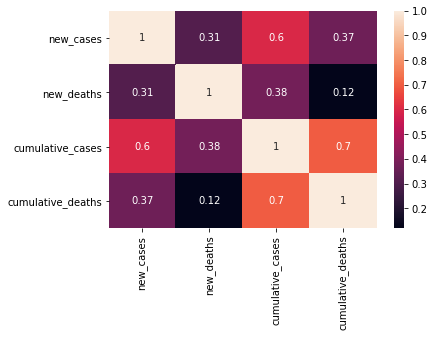

In [37]:
sns.heatmap(np.round(france_status.corr(),2), annot = True)
#heatmap can clearly show correlationships among multivariables 

In [38]:
# There is a signigicant positive correlation between cumulative cases and new cases (coef = 0.83).
# There is a positive correlation between cumulative deaths and new deaths (coef= 0.65).
# There is a lower positive correlation between cumulative deaths and new cases (coef= 0.48).

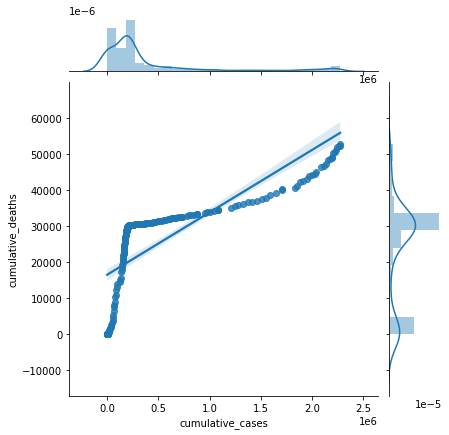

In [39]:
# See the relationship between cumulative cases and cumulative deaths during time changes
sns.jointplot(france_status['cumulative_cases'],france_status['cumulative_deaths'],kind='reg')
# Regression bar can easily show us the correlation between the two variables
# In this graphe, we cna see while the cumulative cases increased and the cumulative deaths increased from the begining. 
# However,later the cumulative deaths increased slowly.

In [40]:
# While the cases increased, the death also increased even quickly. However, afterwards the speed of deaths increase slowed down.